In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.shape

(10841, 13)

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [7]:
df.rename( columns = {'App':'app', 'Category':'category', 'Rating':'rating',
                     'Reviews':'reviews', 'Size':'size', 'Installs':'installs',
                      'Type':'type', 'Price':'price', 'Content_Rating':'content_rating',
                      'Genres':'genres', 'Last_Updated':'last_updated',
                      'Current_Ver':'current_Ver', 'Android_Ver':'android_ver'}, inplace = True)

In [8]:
df.dtypes

app                object
category           object
rating            float64
reviews            object
size               object
installs           object
type               object
price              object
content_rating     object
genres             object
last_updated       object
current_Ver        object
android_ver        object
dtype: object

In [9]:
df['size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
916k                     1
951k                     1
383k                     1
41k                      1
208k                     1
238k                     1
1

In [10]:
df['size'] = df['size'].str.replace('k', 'e+3')
df['size'] = df['size'].str.replace('M', 'e+6')
df['size']

0                     19e+6
1                     14e+6
2                    8.7e+6
3                     25e+6
4                    2.8e+6
5                    5.6e+6
6                     19e+6
7                     29e+6
8                     33e+6
9                    3.1e+6
10                    28e+6
11                    12e+6
12                    20e+6
13                    21e+6
14                    37e+6
15                   2.7e+6
16                   5.5e+6
17                    17e+6
18                    39e+6
19                    31e+6
20                    14e+6
21                    12e+6
22                   4.2e+6
23                   7.0e+6
24                    23e+6
25                   6.0e+6
26                    25e+6
27                   6.1e+6
28                   4.6e+6
29                   4.2e+6
                ...        
10811                3.9e+6
10812                 13e+6
10813                2.7e+6
10814                 31e+6
10815               

In [11]:
def conv(val):
    try:
        float(val)
        return True
    except ValueError:
        return False
temp = df['size'].apply(lambda x: conv(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: size, dtype: bool

In [12]:
df['size'][~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: size, dtype: int64

In [13]:
df['size'] = df['size'].replace('Varies with device', np.nan)
df['size'] = df['size'].replace('1,000+', 1000)

In [14]:
df['size'] = pd.to_numeric(df['size'])

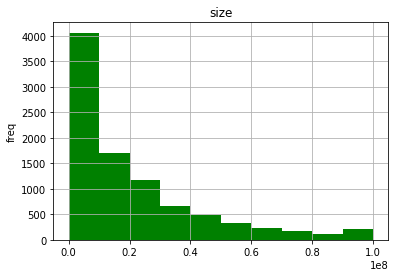

In [15]:
df.hist(column = 'size', color = 'green')
plt.ylabel('freq')
plt.show()

In [16]:
df['installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: installs, dtype: int64

In [17]:
df.installs = df.installs.apply(lambda x: x.strip('+'))
df.installs = df.installs.apply(lambda x: x.replace(',', ''))
df.installs = df.installs.replace('Free', np.nan)

In [18]:
df['installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: installs, dtype: int64

In [19]:
df['installs'].size

10841

In [20]:
df['installs'].dtype

dtype('O')

In [21]:
df['installs'].str.isnumeric().sum()

10840

In [22]:
df['installs'] = pd.to_numeric(df['installs'])

In [23]:
df['installs'].dtype

dtype('float64')

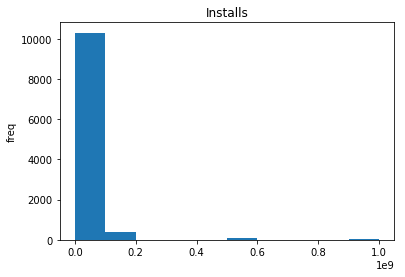

In [24]:
plt.hist(df['installs'])
plt.ylabel('freq')
plt.title('Installs')
plt.show()

In [25]:
df['reviews'].str.isnumeric().sum()

10840

In [26]:
df['reviews'].size

10841

In [27]:
df[~df['reviews'].str.isnumeric()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_Ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [28]:
df = df.drop(df.index[10472])

In [29]:
df[10471:].head(2)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_Ver,android_ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404000.0,100000.0,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100000.0,10000000.0,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [30]:
df['reviews'] = df['reviews'].replace(df['reviews'][~df['reviews'].str.isnumeric()], np.nan)

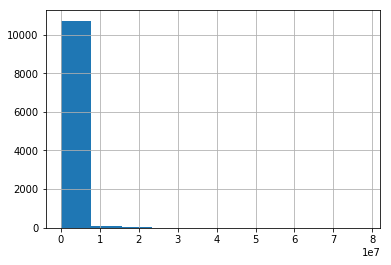

In [31]:
df['reviews'] = pd.to_numeric(df['reviews'])
df['reviews'].hist()
plt.show()

In [32]:
print('range: ', df['rating'].min(), '-', df['rating'].max())

range:  1.0 - 5.0


In [33]:
df['rating'].dtype

dtype('float64')

In [34]:
print(df['rating'].isna().sum(), 'null values')

1474 null values


In [35]:
print('total ', len(df['rating']))

total  10840


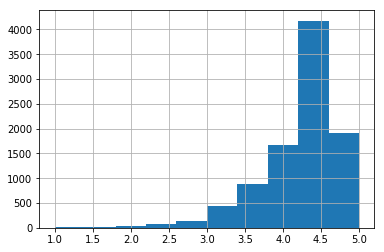

In [36]:
df['rating'].hist()
plt.show()

In [37]:
df['type'].value_counts()

Free    10039
Paid      800
Name: type, dtype: int64

In [38]:
df['price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [39]:
df['price'] = df['price'].apply(lambda x: x.strip('$'))

In [40]:
df['price'] = pd.to_numeric(df['price'])

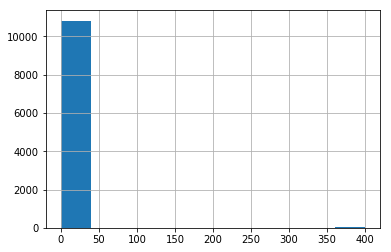

In [41]:
df['price'].hist()
plt.show()

In [42]:
temp = df[df['price'] > 350]

In [43]:
temp.head(5)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_Ver,android_ver
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up


In [44]:
df['category'].unique

<bound method Series.unique of 0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
5             ART_AND_DESIGN
6             ART_AND_DESIGN
7             ART_AND_DESIGN
8             ART_AND_DESIGN
9             ART_AND_DESIGN
10            ART_AND_DESIGN
11            ART_AND_DESIGN
12            ART_AND_DESIGN
13            ART_AND_DESIGN
14            ART_AND_DESIGN
15            ART_AND_DESIGN
16            ART_AND_DESIGN
17            ART_AND_DESIGN
18            ART_AND_DESIGN
19            ART_AND_DESIGN
20            ART_AND_DESIGN
21            ART_AND_DESIGN
22            ART_AND_DESIGN
23            ART_AND_DESIGN
24            ART_AND_DESIGN
25            ART_AND_DESIGN
26            ART_AND_DESIGN
27            ART_AND_DESIGN
28            ART_AND_DESIGN
29            ART_AND_DESIGN
                ...         
10811      AUTO_AND_VEHICLES
10812                 FAMILY
10813       

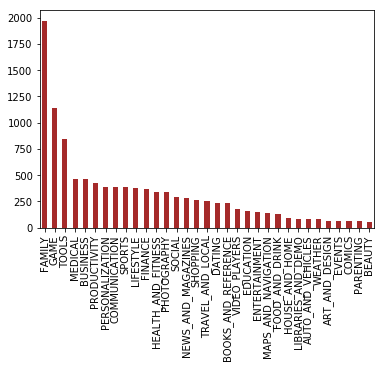

In [45]:
df['category'].value_counts().plot(kind = 'bar', color = 'brown')
plt.show()

In [46]:
df['content_rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

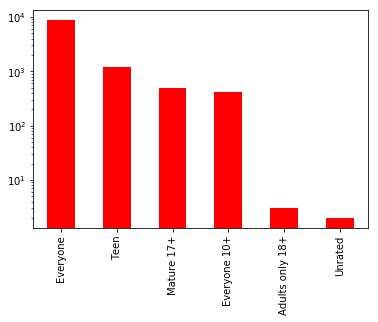

In [47]:
df['content_rating'].value_counts().plot(kind = 'bar', color = 'red')
plt.yscale('log')
plt.show()

In [48]:
df.genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [49]:
r = df['genres'].apply(lambda x: x.split(';')[0])
df['cat_genres'] = r
df['cat_genres'].head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: cat_genres, dtype: object

In [50]:
r = df['genres'].apply(lambda x: x.split(';')[-1])
df['sub_genres'] = r
df['sub_genres'].head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: sub_genres, dtype: object

In [51]:
grp = df.groupby(['cat_genres', 'sub_genres'])
grp.size().head(10)

cat_genres    sub_genres        
Action        Action                365
              Action & Adventure     17
Adventure     Action & Adventure     13
              Adventure              75
              Brain Games             1
              Education               2
Arcade        Action & Adventure     16
              Arcade                220
              Pretend Play            1
Art & Design  Action & Adventure      2
dtype: int64

In [52]:
tab = pd.crosstab(index = df['cat_genres'], columns = df['sub_genres'])
tab.head()

sub_genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
cat_genres,,,,,,,,,,,,,,,,,,,,,
Action,365,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,75,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,16,0,220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,2,0,0,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


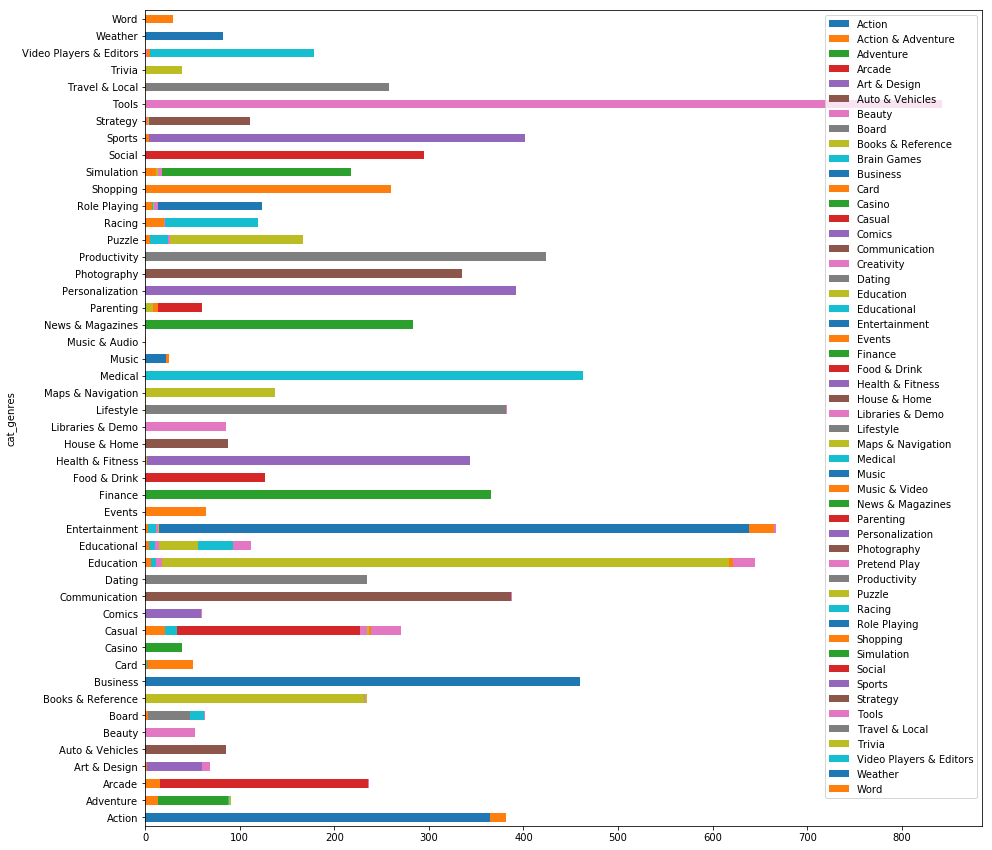

In [53]:
tab.plot(kind = 'barh', figsize = (15, 15), stacked = True)
plt.legend()
plt.show()

In [54]:
df['last_updated']

0           January 7, 2018
1          January 15, 2018
2            August 1, 2018
3              June 8, 2018
4             June 20, 2018
5            March 26, 2017
6            April 26, 2018
7             June 14, 2018
8        September 20, 2017
9              July 3, 2018
10         October 27, 2017
11            July 31, 2018
12            April 2, 2018
13            June 26, 2018
14           August 3, 2018
15             June 6, 2018
16            July 31, 2018
17         November 7, 2017
18           August 3, 2018
19            July 30, 2018
20           April 20, 2018
21           March 20, 2018
22            July 12, 2018
23            March 7, 2018
24             July 7, 2018
25           April 25, 2018
26         October 11, 2017
27           March 21, 2018
28            July 12, 2018
29          August 22, 2017
                ...        
10811         July 24, 2018
10812         June 13, 2018
10813         July 17, 2018
10814          June 3, 2015
10815         July 1

In [55]:
temp = pd.to_datetime(df['last_updated'])

In [56]:
temp.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: last_updated, dtype: datetime64[ns]

In [57]:
df['lst_upd_days'] = temp.apply(lambda z: date.today()-datetime.date(z))
df['lst_upd_days'].head()

0   598 days
1   590 days
2   392 days
3   446 days
4   434 days
Name: lst_upd_days, dtype: timedelta64[ns]

In [59]:
df['android_ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [60]:
df['ver_bin'] = df['android_ver'].apply(lambda z: str(z).split(' and ')[0].split(' - ')[0])
df['ver_bin'] = df['ver_bin'].replace('4.4W', '4.4')
df['ver_en'] = df['android_ver'].apply(lambda z: str(z).split(' and ')[-1].split(' - ')[-1])

In [62]:
df['ver_bin'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       'nan', '1.0'], dtype=object)

In [63]:
df['ver_en'].unique()

array(['up', 'Varies with device', '7.1.1', '8.0', 'nan', '6.0'],
      dtype=object)

In [64]:
ab = pd.crosstab(index = df['ver_bin'], columns = df['ver_en'])

In [65]:
ab.head()

ver_en,6.0,7.1.1,8.0,Varies with device,nan,up
ver_bin,,,,,,
1.0,0,0,0,0,0,2
1.5,0,0,0,0,0,20
1.6,0,0,0,0,0,116
2.0,0,0,0,0,0,32
2.0.1,0,0,0,0,0,7


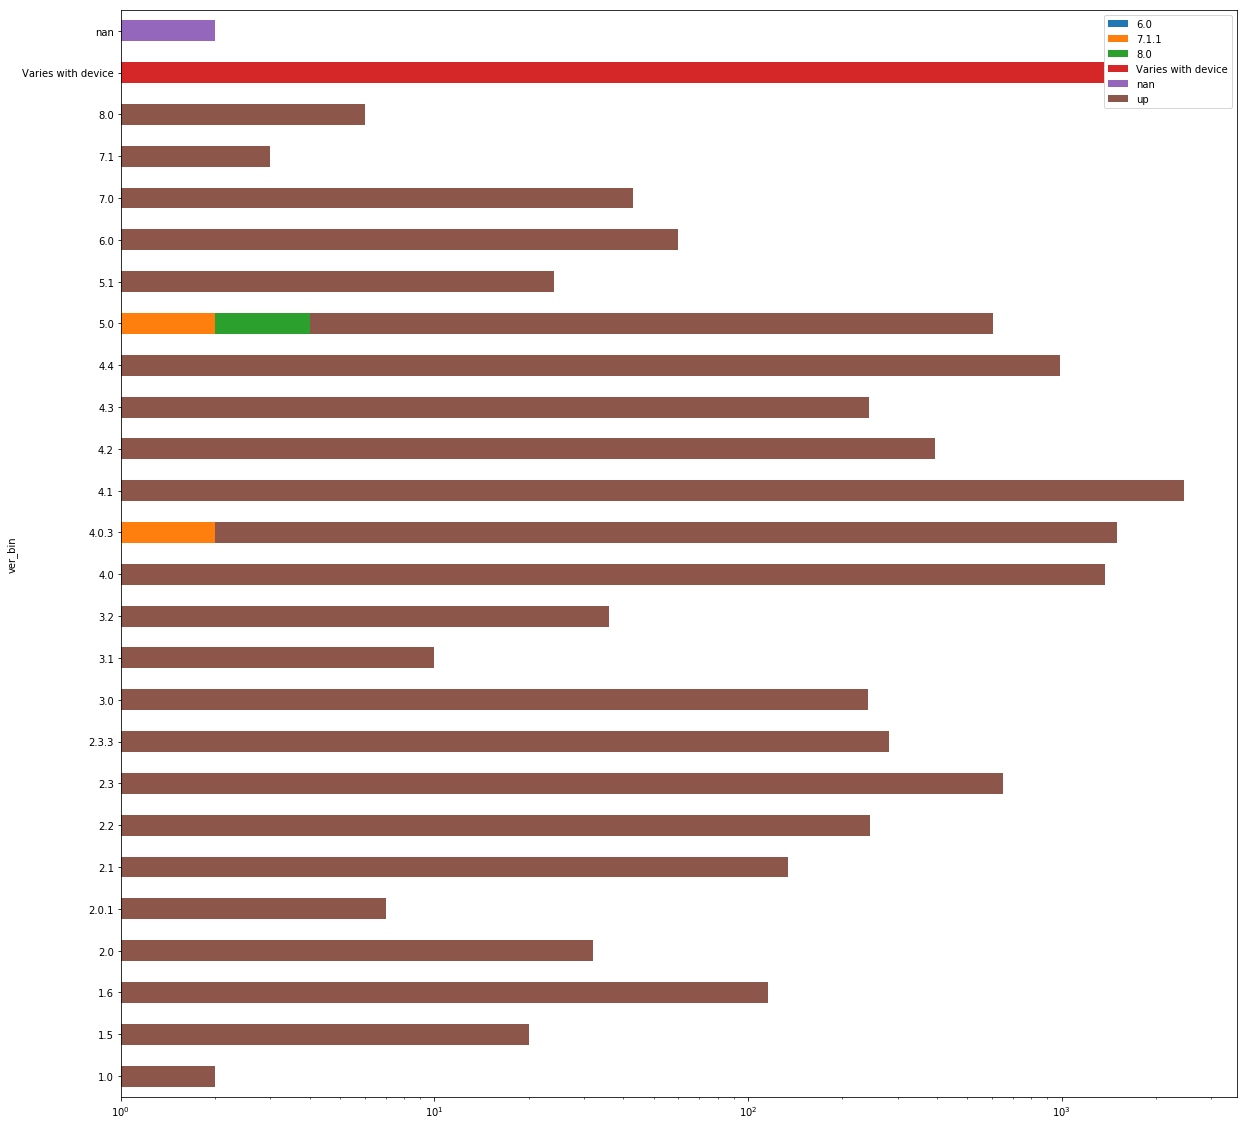

In [67]:
ab.plot(kind = 'barh', figsize = (20, 20), stacked = True)
plt.legend()
plt.xscale('log')
plt.show()

In [71]:
df['current_Ver'].value_counts().head(10)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
Name: current_Ver, dtype: int64

In [69]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_Ver',
       'android_ver', 'cat_genres', 'sub_genres', 'lst_upd_days', 'ver_bin',
       'ver_en'],
      dtype='object')

In [72]:
df['current_Ver'].isna().sum()

8

In [74]:
temp = df['current_Ver'].replace(np.nan, 'Varies')
temp = temp.apply(lambda z: 'Varies'
                  if z == 'Varies'
                  else re.findall('^[0-9]\.[0-9]|[\d]|\W*', str(z))[0])

In [75]:
temp.unique()

array(['1.0', '2.0', '1.2', '', '1.1', '6.1', '2.9', '2.8', '3.8',
       'Varies', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7', '1.6',
       '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9', '0.2',
       '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3', '9.1',
       '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2', '3.5',
       '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3', '6.3',
       '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '6', '7.5', '9.9',
       '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1', '6.6',
       '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0', '8.4',
       '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8', '7.4',
       '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6', '8.9',
       '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

In [77]:
df['cur_ver_up'] = temp

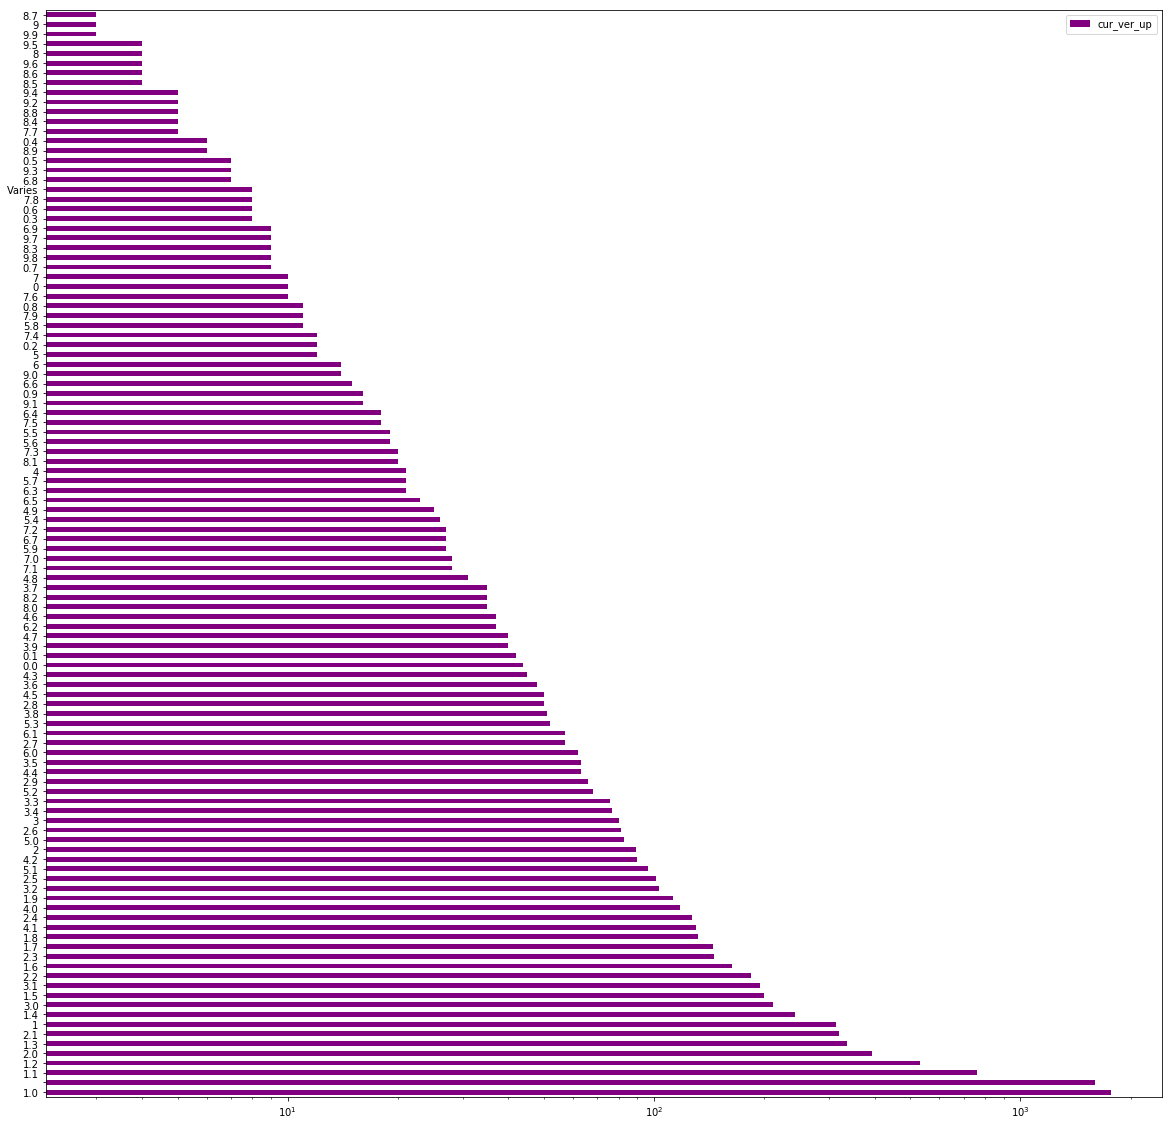

In [81]:
df['cur_ver_up'].value_counts().plot(kind = 'barh', figsize = (20, 20), color= 'purple')
plt.legend()
plt.xscale('log')
plt.show()